# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<h3>Data Distribution</h3>

Ideally we want the sampled data to conform to a Normal Distribution because it will allow us access to a diverse set of tests were this is assumed.

To verify this we created CDF functions from both our data and a matching Normal Distribution and compared them. In the scatter plot below we can see that the data does match a Normal Distribution well enough to make this assumption.

Text(0.5,1,'Empirical DCF and Normal CDF')

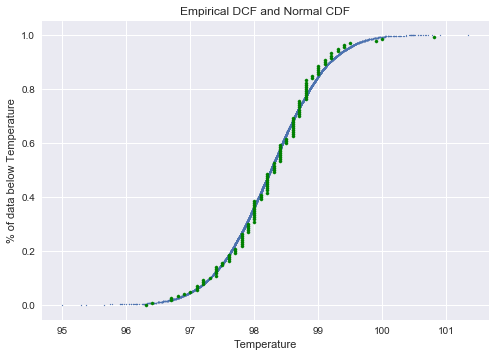

In [3]:
#1. Is the distribution normal?

#Compare Empirical CDF to CDF of Normal Distribution assume normality by inspection
np.random.seed(40)
plt.style.use('seaborn')

#Plot a proper CDF with corresponding mean and std
t_mean = df['temperature'].mean()
t_std = df['temperature'].std()
samples = np.random.normal(t_mean, t_std, size=10000)
samples.sort()
perct = np.arange(len(samples))/len(samples)
plt.scatter(samples, perct, s=1)

#Plot ECDF
data = df['temperature'].sort_values().reset_index(drop=True)
d_perc = data.index / len(data)
plt.scatter(data, d_perc, s=10, c='green')

plt.xlabel('Temperature')
plt.ylabel('% of data below Temperature')
plt.title('Empirical DCF and Normal CDF')

In [47]:
print('Sample Size: ' + str(len(df)))
print('Percentage of Men vs Women: ' + str(len(df[df['gender'] == 'M']) / len(df)))

Sample Size: 130
Percentage of Men vs Women: 0.5


<h3>Is this a proper sample?</h3>

* The sample has 130 observations which is much larger than the commonly recommended 30 sample size where the sample converges to a Normal Distribution with a reliable sample standard deviation
<br><br>
* We do not know if the data was sampled independently but we can see that the porportion of men in the sample is close to the population porportion (.5) which is a good sign of indepent sampling. So we will assume this is true.

<h3>Bootstrap Hypothesis Test</h3>

In the below cell we assume that the mean body tempurature of the human population is 98.6 and use bootstrap sampling methods to test the likelihood of this. Using an alpha value of .05 we will either accept or reject our null hypothesis based upon the p-value generated from the simulation.

In order to simulate a distribution with 98.6 mean body temperature we use the sample data we have and shift it over so that the  mean is equal to the mean of our null hypothesis.

We then take samples of size 130 from the generated data set to simulate samples from the real population. We do this 10,000 times and generate a distribution of the sample means. The distribution is meant to represent the probability of a 130 sample mean given a distribution where 98.6 is the mean temperature.

For all 10,000 samples we found no sample where the mean was as low as the mean of our originally sampled data and therefore find it very unlikely that the true mean of the population is 98.6 degrees and in turn reject the null hypothesis.


Null Hypothesis is rejected - it is very unlikely 98.6 is the correct mean temperature
p - value: 0.0



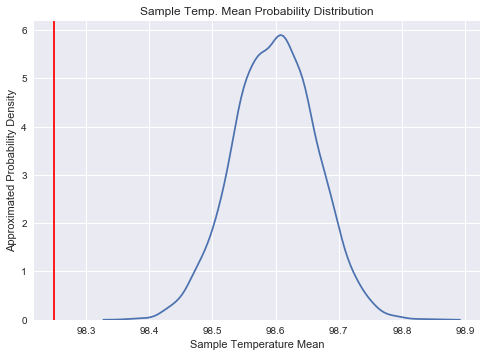

In [97]:
#Use bootstrap method to perform Hypothesis test whether mean human temp. is 98.6
np.random.seed(55)

alpha = .005
print("")

diff = 98.6 - df['temperature'].mean()
null_dist = df['temperature'] + round(diff,2)

means = []

for _ in range(10000):
    sample = np.random.choice(null_dist, size=130)
    means.append(sample.mean())

sns.kdeplot(means)

plt.axvline(x=df['temperature'].mean(), c='red')

plt.xlabel('Sample Temperature Mean')
plt.ylabel('Approximated Probability Density')
plt.title('Sample Temp. Mean Probability Distribution')

p_value = (sum(pd.Series(means) < df['temperature'].mean()) / len(means))

if(p_value > alpha):
    print("Null Hypothesis is accepted - 98.6 may be the correct mean temperature")
    print("p - value: " + str(p_value))
else:
    print("Null Hypothesis is rejected - it is very unlikely 98.6 is the correct mean temperature")
    print("p - value: " + str(p_value))
    
print("")

<h3>Statistical Hypothesis Test</h3>

For this test we use properties of sample means to make an assumption about the sampling distribution and from there determine theoretical probabilities to either reject or accpet the null hypothesis that the mean body temperature is 98.6 for the human population.

Because of the Central Limit Theorem we know that the mean of a sample mean distribution is Normally distributed and that it's mean is the mean of the population, in this case we assume that is 98.6 degrees. We also know that the standard deviation of a sample mean distribution is the standard deviation of the population divided by the square root of the sample size. For this test the sample size is 130 and we substitute the standard deviation of the sample for the standard deviation of the population. It is reasonable to substitute these values because as the sample sizes increases (generally the threshold is 30) the reliability of the standard deviation of the sample increases to a point where we can safely assume it is represenative of the population standard deviation. If the sample size was below 30 we would use a t-distribution to take into account the uncertaintly of the sample standard deviation, but for this example the Normal distribution is sufficient.

Using the above logic we have derived the sample mean distribution. Next we use statistical techniques to evaluate the probability of getting a 130 person sample where the mean body temperature was the mean we saw in our sample, ~98.24, based on this distribution. It turns out that this probability is extremely low, nearly zero infact, so we are safetly able to reject our null hypothesis and assume that the mean human body temperature is below 98.6 degrees.


Null Hypothesis is rejected - it is very unlikely 98.6 is the correct mean temperature
p - value: 2.45107850705669e-08



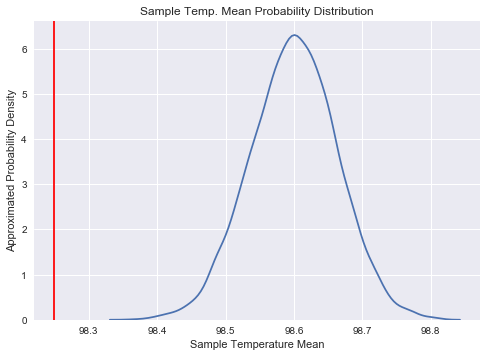

In [101]:
#Classical Sample Mean Hypothesis Test
null_hypothesis = 98.6
alpha = .05

sample_mean = df['temperature'].mean()
sample_std = df['temperature'].std()
n = len(df)

#Graph dist
samples = np.random.normal(null_hypothesis, (sample_std / np.sqrt(n)), size=10000)
sns.kdeplot(samples)
plt.axvline(x=sample_mean, c='red')
plt.xlabel('Sample Temperature Mean')
plt.ylabel('Approximated Probability Density')
plt.title('Sample Temp. Mean Probability Distribution')

#Perform statistical test
z_score = (null_hypothesis - sample_mean) / (sample_std / np.sqrt(n))
p_value = scipy.stats.norm.sf(z_score)

print("")

if(p_value > alpha):
    print("Null Hypothesis is accepted - 98.6 may be the correct mean temperature")
    print("p - value: " + str(p_value))
else:
    print("Null Hypothesis is rejected - it is very unlikely 98.6 is the correct mean temperature")
    print("p - value: " + str(p_value))
    
print("")

<h3>Small Samples</h3>

Next we show the inferential impact of smaller samples. We simulate a small sample by randomly selecting ten values from our original sample. We then perform the same Hypothesis test we did in the above cell where we theoretically generate a distribution based on the mean and standard deviation of our sample then test the likelyhood that the sample came from a distribution where the mean is 98.6 degrees. 

Here we show the use of a T-test, used here because the sample size is small so we need to take into account the uncertainty of the sample standard deviation. As shown below the t-test gives a slightly greater probability than the normal or z-test and should be used when n is below 30. However we can see that in both tests the Hypothesis had be to accepted because the p-values are above alpha. 

By decreasing our sample size the standard deviation of our sample mean distribution increases and prevents us from being able to make conclusions that we were able to make with larger samples.










Alpha: 0.05
Normal p-value: 0.12
T p-value: 0.13



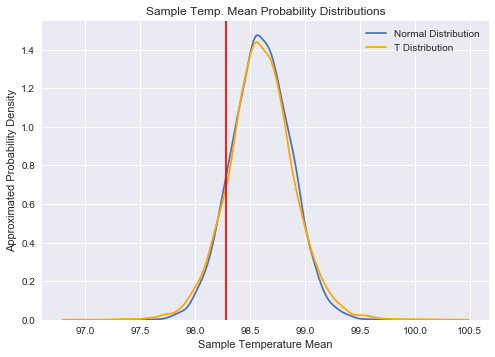

In [153]:
#Classical Sample Mean Hypothesis Test
np.random.seed(10011)

null_hypothesis = 98.6
alpha = .05
n = 10

small_sample = np.random.choice(df['temperature'], size=n)

sample_mean = small_sample.mean()
sample_std = small_sample.std()

#Graph distributions
samples = np.random.normal(null_hypothesis, (sample_std / np.sqrt(n)), size=10000)
n_plot = sns.kdeplot(samples, label='Normal Distribution')

t_samples = scipy.stats.t.rvs(loc=null_hypothesis, scale=(sample_std / np.sqrt(n)), df=9, size=10000)
t_plot = sns.kdeplot(t_samples, color='orange', label='T Distribution')

plt.axvline(x=sample_mean, c='red')

plt.xlabel('Sample Temperature Mean')
plt.ylabel('Approximated Probability Density')
plt.title('Sample Temp. Mean Probability Distributions')

#Perform statistical test
score = (null_hypothesis - sample_mean) / (sample_std / np.sqrt(n))

Norm_p_value = scipy.stats.norm.sf(score).round(2)
T_p_value = scipy.stats.t.sf(score, df=9).round(2)

print("")
print("Alpha: " + str(alpha))
print("Normal p-value: " + str(Norm_p_value))
print("T p-value: " + str(T_p_value))
print("")

<h3>Body Temperature Confidence Intervals</h3>
Below we estimate an interval where 95% of the population's body temperatures are within. We use two methods for approximating this interval which result in slightly different ranges. For both tests it is important that the human body temperature conforms to a normal distribution. We showed why we can assume this earlier in the Notebook.

<h4>Bootstrap Method</h4>
Using the collected data we generate 500 samples in order to simulate sampling from the population distribution. We can then use the 2.5 and 97.5 percentiles of the data to create the confidence interval. 

<h4>Theoretical Inference</h4>
In this case we use a theoretical Normal distribution with parameters that match our data to represent the population distribution. We can then create a sample from this distribution and calculate the percentiles for our interval.



Sample Simulation Interval: 96.7 - 99.4
Theoretical Distribution: 96.8 - 99.7



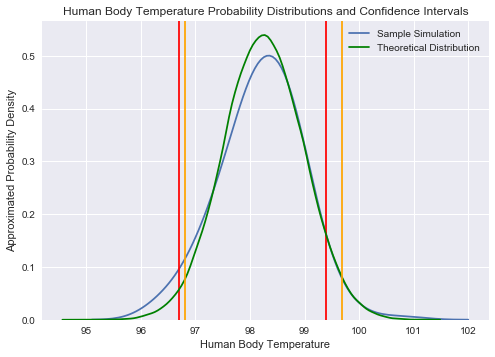

In [196]:
#Generate confidence intervals to determine normal body temperature within a 95% range
np.random.seed(111223)

#Generate interval using bootstrap methods
samples = np.random.choice(df['temperature'], size=500)
temp_range = np.percentile(samples, [2.5,97.5])

#Generate interval using theoretical statistical inference
t_mean = df['temperature'].mean()
t_std = df['temperature'].std()
norm_samples = np.random.normal(t_mean, t_std, size=100000)
norm_temp_range = np.percentile(norm_samples, [2.5,97.5])

#Plot thresholds
sns.kdeplot(samples, bw=.4, label='Sample Simulation')
plt.axvline(x=temp_range[0], c='red')
plt.axvline(x=temp_range[1], c='red')

sns.kdeplot(norm_samples, label='Theoretical Distribution', color='green')
plt.axvline(x=norm_temp_range[0], c='orange')
plt.axvline(x=norm_temp_range[1], c='orange')

plt.xlabel('Human Body Temperature')
plt.ylabel('Approximated Probability Density')
plt.title('Human Body Temperature Probability Distributions and Confidence Intervals')

print("")
print("Sample Simulation Interval: " + str(temp_range[0]) + ' - ' + str(temp_range[1]))
print("Theoretical Distribution: " + str(norm_temp_range[0].round(1)) + ' - ' + str(norm_temp_range[1].round(1)))
print("")

<h3>Are women naturally hotter?</h3>

Biologically that is..a sample of 130 people confidently shows that women do in fact have a naturally higher body temperature than men. In fact based on the statistical tests used we are over 98% confident that this is the case. Samples were taken independently of 65 men and women, the woman had an average body temperature of 98.4 while the men's average body temperature was 98.1 degrees. This large difference of .3 degrees is unlikely to be due to chance.

To test for the likelihood of difference due to chance we simulated a distribution where the means are equal then found the likelihood of the difference being as extreme as the case we saw. This was done through both resampling and theoretical methods. 


Alpha: 0.05
Sample Difference p-value: 0.01243
Theoretical Difference p-value: 0.0123



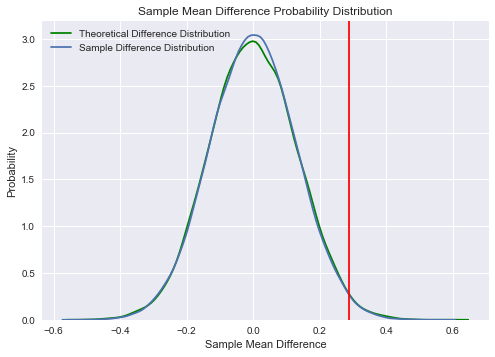

In [32]:
#Calculate probabilities that women and men have the same body temperature
np.random.seed(12624)

alpha = .05

males = df[df['gender'] == 'M']['temperature']
females = df[df['gender'] != 'M']['temperature']

sample_diff = round(f_mean - m_mean, 3)

#Bootstrap method
diffs = []

for i in range(100000):
    sample = np.random.permutation(df['temperature'])
    m_sample = sample[:len(males)]
    f_sample = sample[len(males):]
    diffs.append(f_sample.mean() - m_sample.mean())

df_diffs = pd.Series(diffs)
boot_p_value = len(df_diffs[df_diffs > sample_diff])/len(diffs)

#Theoretical Method
diff_std = np.sqrt(((df['temperature'].std() ** 2) / len(males) + ((df['temperature'].std() ** 2) / len(males))))
z_score = (sample_diff) / diff_std
stat_p_value = round(scipy.stats.norm.sf(z_score), 4)


norm_samples = np.random.normal(0, diff_std, size=10000)
sns.kdeplot(norm_samples, label='Theoretical Difference Distribution', color='green')

sns.kdeplot(diffs, label='Sample Difference Distribution')
plt.axvline(x=sample_diff, c='red')

plt.xlabel('Sample Mean Difference')
plt.ylabel('Probability')
plt.title('Sample Mean Difference Probability Distribution')
                    
print("")
print("Alpha: " + str(alpha))
print("Sample Difference p-value: " + str(boot_p_value))
print("Theoretical Difference p-value: " + str(stat_p_value))
print("")